<a href="https://colab.research.google.com/github/kiyer722/COVID19_data_analysis/blob/main/DataAnalysis/%EA%B9%80%EA%B0%80%EC%98%81/2019data_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,446 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146425 files and d

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import seaborn as sns

In [ ]:
filename='/content/drive/MyDrive/covid19데이터마이닝/최종 데이터/2019data(ver3).csv'

In [ ]:
data=pd.read_csv(filename, encoding='CP949')
data.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균
0,2019,1,1000985,암사길,CS200003,20061598.0,125,3,0,1,1691955,7132,257,96,13,LL,다이나믹,100,47
1,2019,1,1000985,암사길,CS300018,51140049.0,5122,2,0,0,1691955,7132,257,96,13,LL,다이나믹,100,47
2,2019,1,1000985,암사길,CS300002,951735545.0,122840,2,0,1,1691955,7132,257,96,13,LL,다이나믹,100,47
3,2019,1,1000985,암사길,CS100005,24860481.0,3306,3,2,0,1691955,7132,257,96,13,LL,다이나믹,100,47
4,2019,1,1000985,암사길,CS100006,10524597.0,322,1,0,0,1691955,7132,257,96,13,LL,다이나믹,100,47


In [ ]:
data.tail()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균
100573,2019,3,1000546,중앙로47길,CS200028,12817341.0,320,6,0,0,957312,1901,79,35,1,HH,정체,140,58
100574,2019,3,1000546,중앙로47길,CS300007,117813256.0,4723,1,0,0,957312,1901,79,35,1,HH,정체,140,58
100575,2019,3,1001337,유영시장,CS100002,37145087.0,1747,1,0,0,27425,116,32,1,0,HH,정체,139,62
100576,2019,3,1001281,청평화시장,CS300001,100730024.0,15379,9,0,0,73069,1,117,0,1,LH,상권확장,102,66
100577,2019,3,1001345,새석관시장,CS200028,3776385.0,103,2,0,0,38543,80,4,2,1,HH,정체,186,57


In [ ]:
cols=data.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,17,18,15,16]]
data=data[cols]

In [ ]:
data.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표,상권_변화_지표_명
0,2019,1,1000985,암사길,CS200003,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,LL,다이나믹
1,2019,1,1000985,암사길,CS300018,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,LL,다이나믹
2,2019,1,1000985,암사길,CS300002,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,LL,다이나믹
3,2019,1,1000985,암사길,CS100005,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,LL,다이나믹
4,2019,1,1000985,암사길,CS100006,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,LL,다이나믹


In [ ]:
data=data.drop(data.columns[[18]],axis='columns')
data.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,2019,1,1000985,암사길,CS200003,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,LL
1,2019,1,1000985,암사길,CS300018,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,LL
2,2019,1,1000985,암사길,CS300002,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,LL
3,2019,1,1000985,암사길,CS100005,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,LL
4,2019,1,1000985,암사길,CS100006,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,LL


In [ ]:
data=data.replace("LL",1)

In [ ]:
data=data.replace("HH",1)

In [ ]:
data=data.replace("LH",1)

In [ ]:
data=data.replace("HL",0)

In [ ]:
data

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,2019,1,1000985,암사길,CS200003,20061598.0,125,3,0,1,1691955,7132,257,96,13,100,47,1
1,2019,1,1000985,암사길,CS300018,51140049.0,5122,2,0,0,1691955,7132,257,96,13,100,47,1
2,2019,1,1000985,암사길,CS300002,951735545.0,122840,2,0,1,1691955,7132,257,96,13,100,47,1
3,2019,1,1000985,암사길,CS100005,24860481.0,3306,3,2,0,1691955,7132,257,96,13,100,47,1
4,2019,1,1000985,암사길,CS100006,10524597.0,322,1,0,0,1691955,7132,257,96,13,100,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100573,2019,3,1000546,중앙로47길,CS200028,12817341.0,320,6,0,0,957312,1901,79,35,1,140,58,1
100574,2019,3,1000546,중앙로47길,CS300007,117813256.0,4723,1,0,0,957312,1901,79,35,1,140,58,1
100575,2019,3,1001337,유영시장,CS100002,37145087.0,1747,1,0,0,27425,116,32,1,0,139,62,1
100576,2019,3,1001281,청평화시장,CS300001,100730024.0,15379,9,0,0,73069,1,117,0,1,102,66,1


In [ ]:
data.to_csv("2019data(mapping_ver3).csv",encoding='utf-8-sig')

In [ ]:
def bar_chart(feature):
  sc=data[data['상권_변화_지표']==1][feature].value_counts()
  di=data[data['상권_변화_지표']==0][feature].value_counts()
  df=pd.DataFrame([sc,di])
  df.index=['sc','di']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

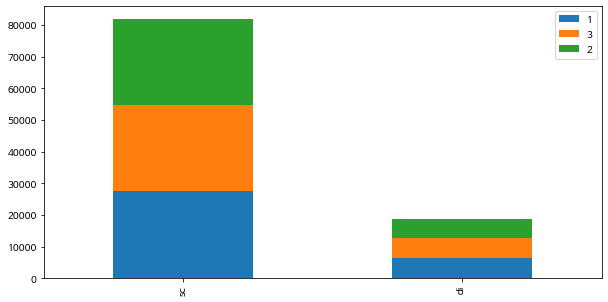

In [ ]:
bar_chart('기준_분기_코드')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


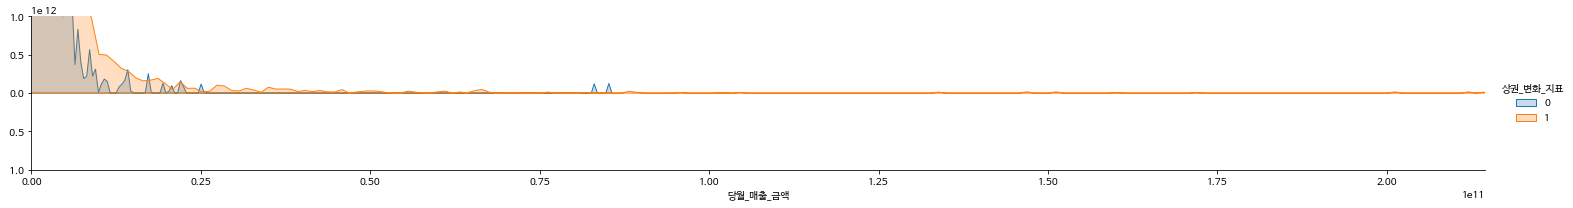

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'당월_매출_금액',shade=True)
facet.set(xlim=(0,data['당월_매출_금액'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


(0.0, 0.2)

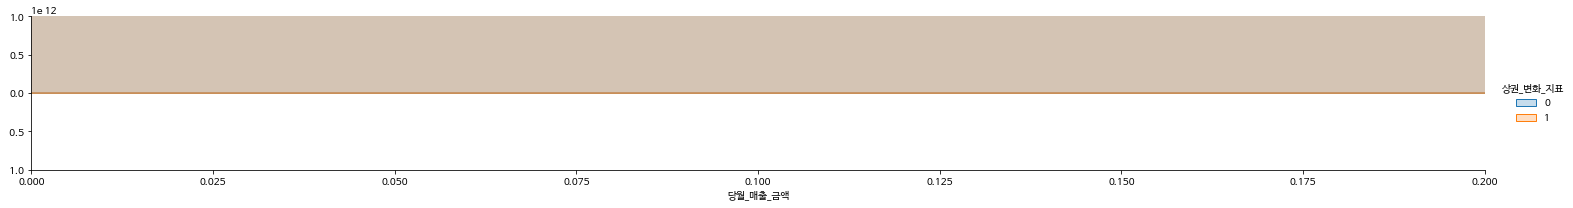

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'당월_매출_금액',shade=True)
facet.set(xlim=(0,data['당월_매출_금액'].max()))
facet.add_legend()

plt.xlim(0,0.2)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


(0.0, 150000.0)

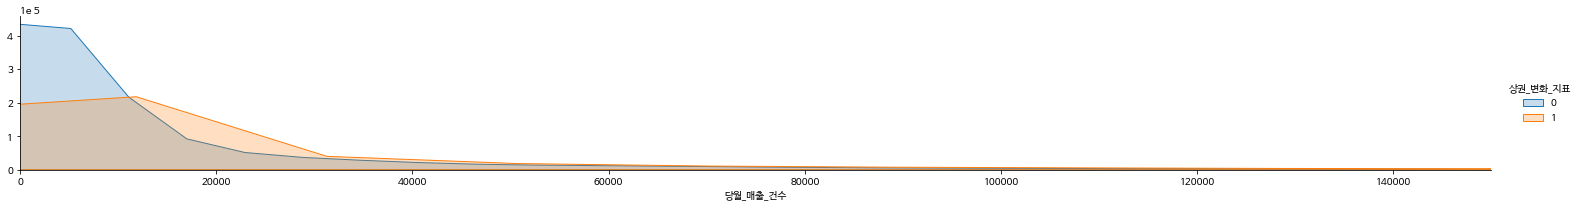

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'당월_매출_건수',shade=True)
facet.set(xlim=(0,data['당월_매출_건수'].max()))
facet.add_legend()

plt.xlim(0,150000)

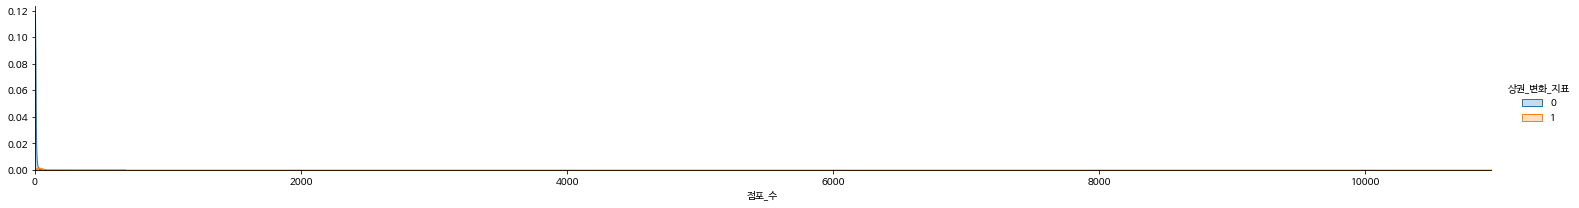

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'점포_수',shade=True)
facet.set(xlim=(0,data['점포_수'].max()))
facet.add_legend()

plt.show()

(0.0, 100.0)

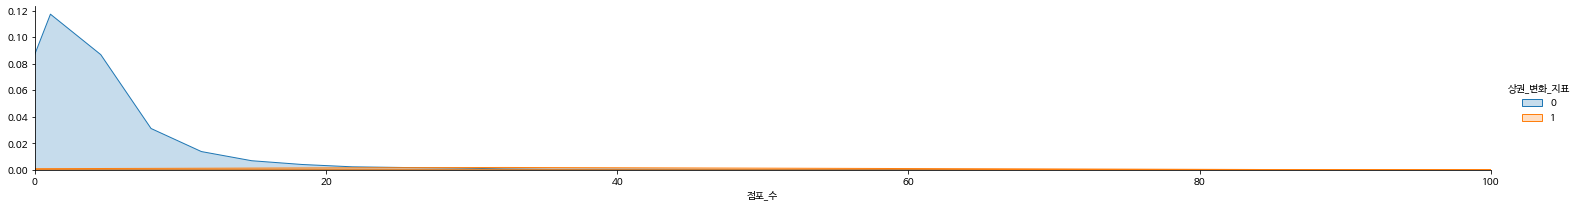

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'점포_수',shade=True)
facet.set(xlim=(0,data['점포_수'].max()))
facet.add_legend()

plt.xlim(0,100)

(0.0, 5.0)

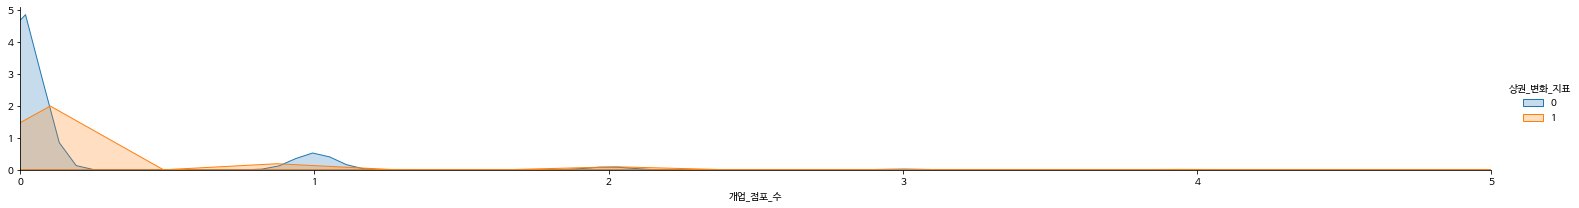

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'개업_점포_수',shade=True)
facet.set(xlim=(0,data['개업_점포_수'].max()))
facet.add_legend()

plt.xlim(0,5)

(0.0, 5.0)

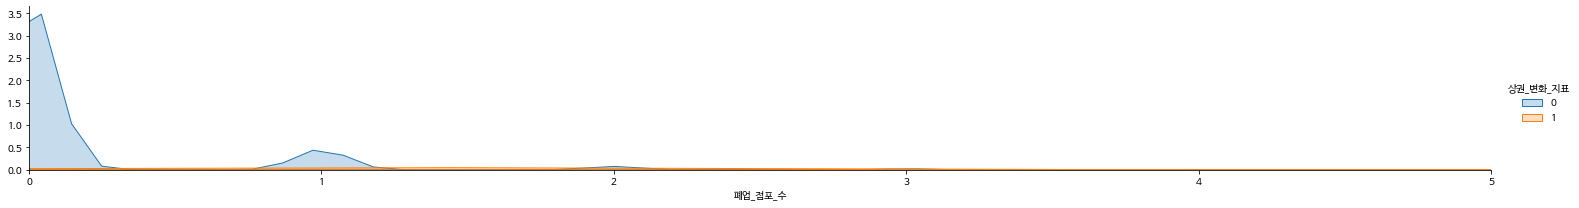

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'폐업_점포_수',shade=True)
facet.set(xlim=(0,data['폐업_점포_수'].max()))
facet.add_legend()

plt.xlim(0,5)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


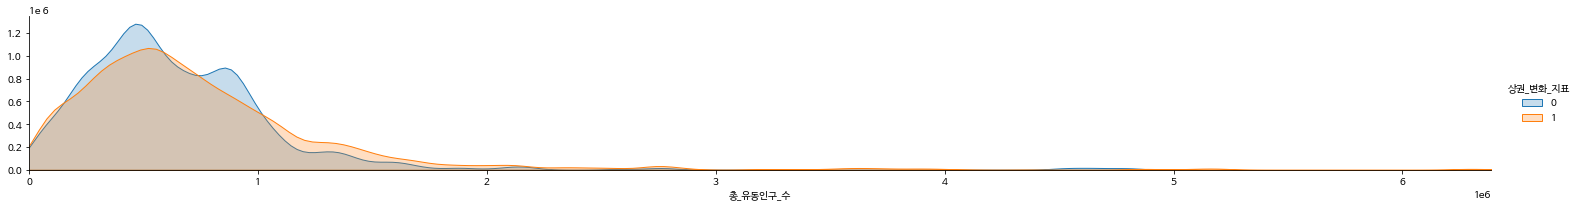

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'총_유동인구_수',shade=True)
facet.set(xlim=(0,data['총_유동인구_수'].max()))
facet.add_legend()

plt.show()

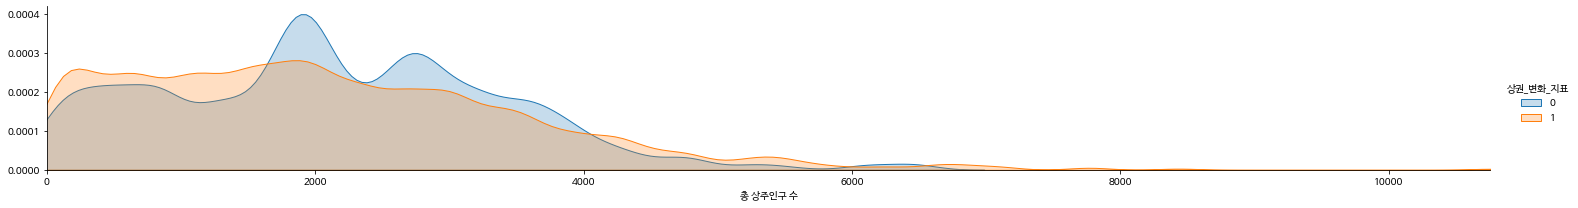

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'총 상주인구 수',shade=True)
facet.set(xlim=(0,data['총 상주인구 수'].max()))
facet.add_legend()

plt.show()

(0.0, 10000.0)

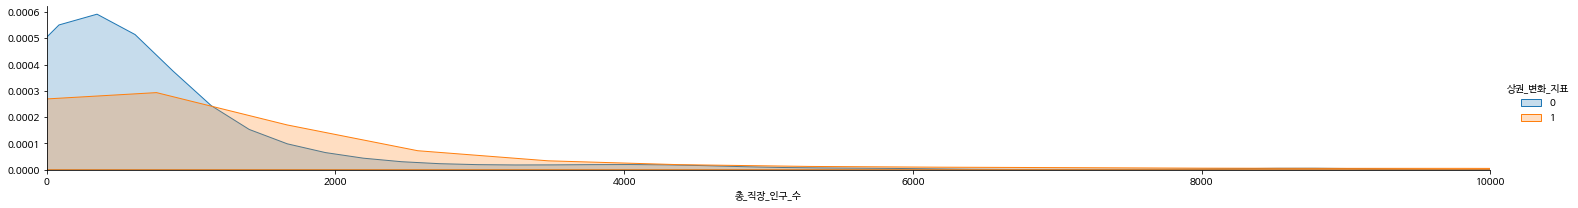

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'총_직장_인구_수',shade=True)
facet.set(xlim=(0,data['총_직장_인구_수'].max()))
facet.add_legend()

plt.xlim(0,10000)

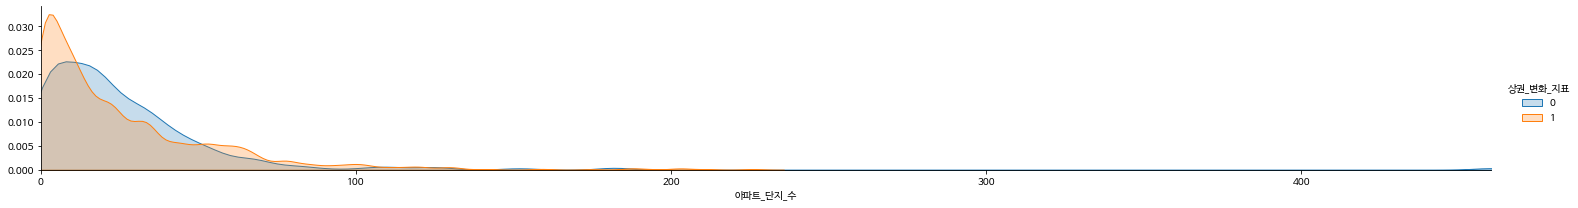

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'아파트_단지_수',shade=True)
facet.set(xlim=(0,data['아파트_단지_수'].max()))
facet.add_legend()

plt.show()

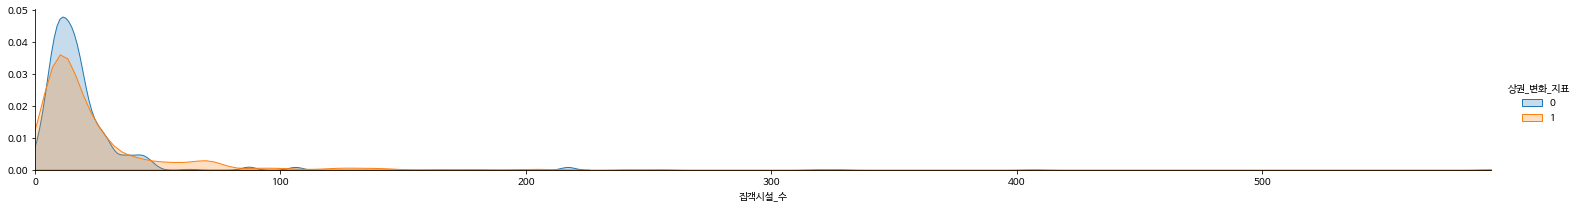

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'집객시설_수',shade=True)
facet.set(xlim=(0,data['집객시설_수'].max()))
facet.add_legend()

plt.show()

(0.0, 300.0)

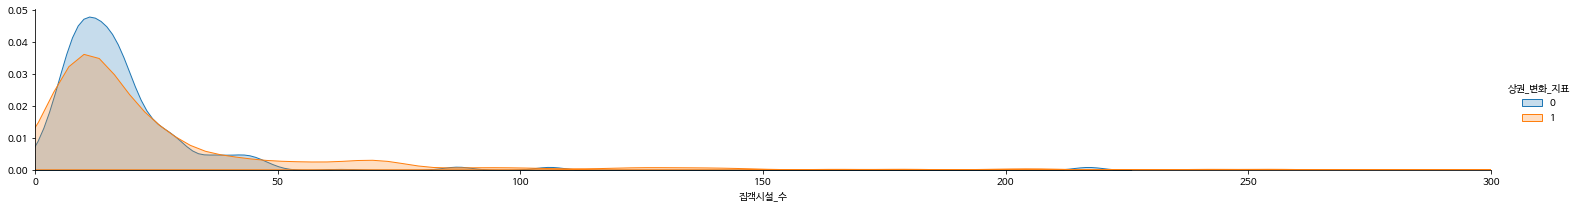

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'집객시설_수',shade=True)
facet.set(xlim=(0,data['집객시설_수'].max()))
facet.add_legend()

plt.xlim(0,300)

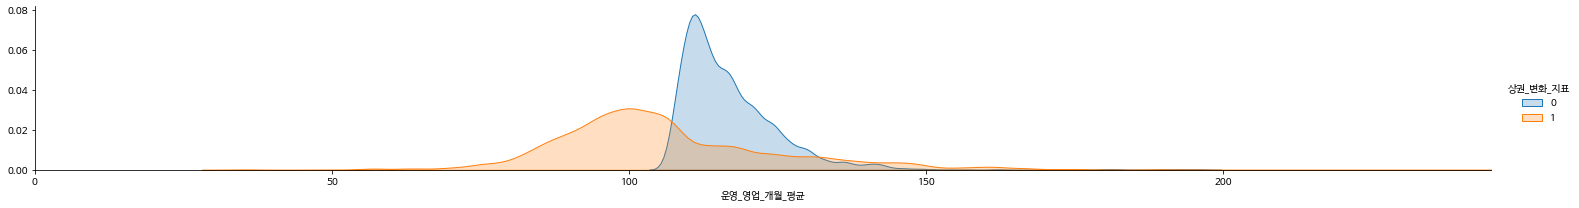

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'운영_영업_개월_평균',shade=True)
facet.set(xlim=(0,data['운영_영업_개월_평균'].max()))
facet.add_legend()

plt.show()

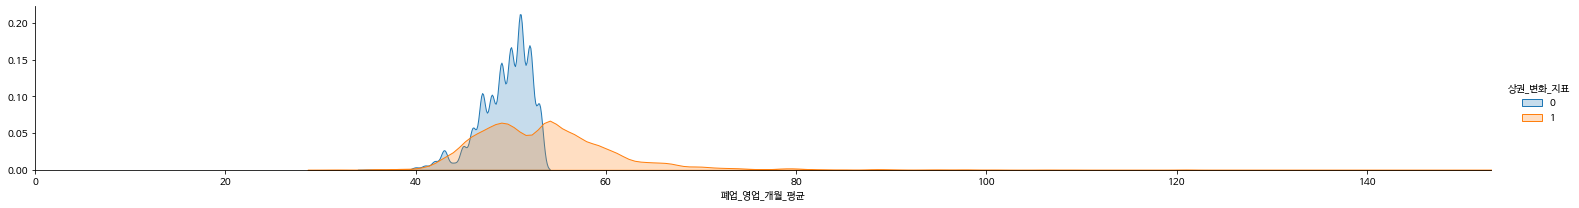

In [ ]:
facet=sns.FacetGrid(data,hue="상권_변화_지표",aspect=7)
facet.map(sns.kdeplot,'폐업_영업_개월_평균',shade=True)
facet.set(xlim=(0,data['폐업_영업_개월_평균'].max()))
facet.add_legend()

plt.show()